<a href="https://colab.research.google.com/github/Shuvro-Ahmed/Classification-of-Music-Genres/blob/main/CSE422_PROJECT_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MOUNT TO DRIVE

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#IMPORT
import pandas as pd

# Read in track metadata with genre labels
tracks = pd.read_csv('/content/gdrive/MyDrive/CSE422_PROJECT/Dataset/fma-rock-vs-hiphop.csv')

# Read in track metrics with the features
echonest_metrics = pd.read_json('/content/gdrive/MyDrive/CSE422_PROJECT/Dataset/echonest-metrics.json', precise_float=True)

In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [ ]:
#TRACKS
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [ ]:
echonest_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
#echonest_metrics
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [ ]:
# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['genre_top', 'track_id']], on='track_id')

# Inspect the resultant dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [ ]:
echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [ ]:
echo_tracks['genre_top'].unique()

array(['Hip-Hop', 'Rock'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding 
echo_tracks['genre_top_enc'] = enc.fit_transform(echo_tracks['genre_top'])


print(echo_tracks[['genre_top_enc']].head())

   genre_top_enc
0              0
1              0
2              0
3              0
4              1


In [ ]:
# Create a correlation matrix
corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()
# Create a correlation matrix
#corr_metrics = echonest_metrics.corr()
#corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top_enc
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070,-0.004624
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841,0.097748
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165,-0.484457
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603,0.124860
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967,0.326037
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093,-0.007070
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894,-0.496495
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221,0.114571
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000,-0.246701
genre_top_enc,-0.004624,0.097748,-0.484457,0.124860,0.326037,-0.007070,-0.496495,0.114571,-0.246701,1.000000


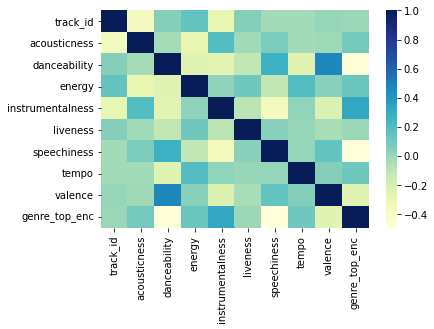

In [ ]:
import seaborn as sns

sns.heatmap(corr_metrics, cmap = 'YlGnBu')

In [ ]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# Create features
features = echo_tracks.drop(["genre_top", "track_id", "genre_top_enc"], axis=1).values

# Create labels
labels = echo_tracks["genre_top"].values

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

In [ ]:
print(echo_tracks.isnull().sum())

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
genre_top_enc       0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaacc98ac0>,
      dtype=object)

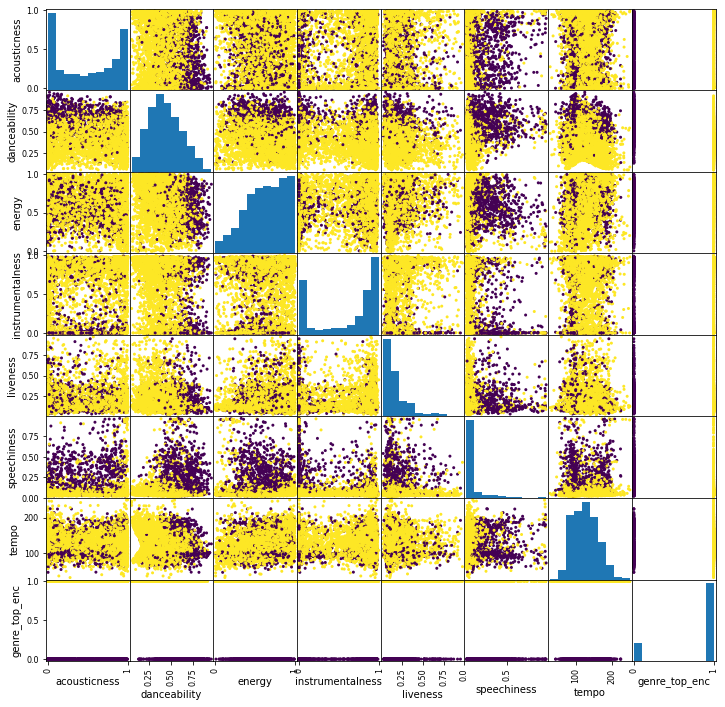

In [ ]:
#Scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(echo_tracks[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "genre_top_enc"]], c=echo_tracks["genre_top_enc"] , figsize=(12,12), alpha=1)

In [ ]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [ ]:
scaled_test_features

array([[ 0.57834602, -0.11982028, -1.66703124, ..., -0.48884549,
        -0.2432301 , -1.30117572],
       [-0.84104522,  0.79292784, -1.21864922, ..., -0.47200991,
         0.10121107, -0.96936884],
       [ 0.97939601,  0.93441209, -1.26751374, ..., -0.50197707,
        -0.02696062,  1.54480534],
       ...,
       [-1.32422291,  1.11343136,  1.10179908, ..., -0.469771  ,
        -0.92775465,  0.84214372],
       [-1.23151971,  0.92743926, -0.74888451, ..., -0.55735342,
        -1.34377528,  0.99756255],
       [-0.85783782,  0.43928193,  0.74587921, ..., -0.54594451,
        -0.04665895,  0.51264619]])

In [ ]:
scaled_train_features

array([[ 1.24994743, -1.64927931, -2.45820448, ..., -0.37842314,
         2.49377868, -1.55894527],
       [-1.33744998, -1.75457157,  0.5134387 , ..., -0.41242335,
        -0.9269891 , -0.34245846],
       [-1.25231142,  1.06248053,  0.8446325 , ..., -0.25073824,
        -0.87080909,  0.76835644],
       ...,
       [ 0.57155165,  0.33498906,  1.0903065 , ...,  0.09162497,
        -0.98478855, -1.49489566],
       [-0.59796575, -1.06590307,  0.96040794, ..., -0.43911589,
         0.1941672 ,  0.63440245],
       [ 0.86450057, -1.56700198,  0.62198965, ..., -0.31918535,
         1.35006794, -1.15493548]])

Text(0.5, 0, 'Principal Component #')

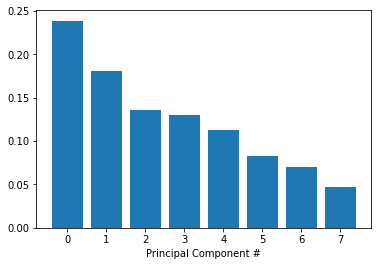

In [ ]:
# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

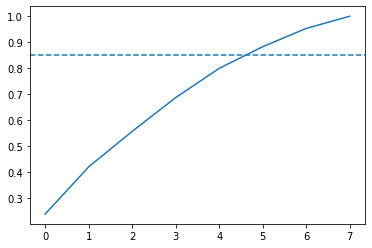

In [ ]:
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [ ]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=6, random_state=10)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

In [ ]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create our decision tree
tree = DecisionTreeClassifier(random_state=10)

# Train our decision tree
tree.fit(train_pca, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

In [ ]:
pred_labels_tree

array(['Rock', 'Rock', 'Rock', ..., 'Hip-Hop', 'Rock', 'Rock'],
      dtype=object)

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logisitic regression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.62       235
        Rock       0.91      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.85      0.85      0.85      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [ ]:
#Confusion matrix
#For decsion tree
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(pred_labels_tree, test_labels)
print(mat)

[[146  87]
 [ 89 879]]


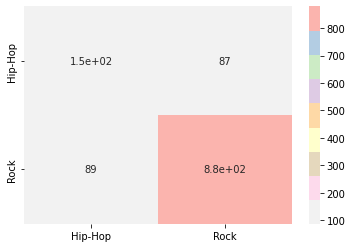

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['Hip-Hop' ,'Rock'], yticklabels=['Hip-Hop' ,'Rock'], annot=True)

In [ ]:
#For Logistic Regression
mat=confusion_matrix(pred_labels_logit, test_labels)
print(mat)

[[128  39]
 [107 927]]


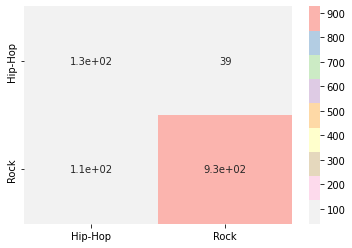

In [ ]:
heatmap(mat , cmap="Pastel1_r", xticklabels=['Hip-Hop' ,'Rock'], yticklabels=['Hip-Hop' ,'Rock'], annot=True)

In [ ]:
# Subset a balanced proportion of data points
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

# subset only the rock songs, and take a sample the same size as there are hip-hop songs
rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

# concatenate the dataframes hop_only and rock_only
rock_hop_bal = pd.concat([rock_only, hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

In [ ]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca, train_labels)
pred_labels_tree = tree.predict(test_pca)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_pca, train_labels)
pred_labels_gnb = gnb.predict(test_pca)

#Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(train_pca, train_labels)
pred_labels_svc = svc.predict(test_pca)

#Ensemble Classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(train_pca, train_labels)
pred_labels_rfc = rfc.predict(test_pca)

#Neural Network Classifier
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(train_pca, train_labels)
pred_labels_nnc = nnc.predict(test_pca)

# compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))
print("Naive Bias: \n", classification_report(test_labels, pred_labels_gnb))
print("SVC: \n", classification_report(test_labels, pred_labels_svc))
print("Random Forest: \n", classification_report(test_labels, pred_labels_rfc))
print("Neural network Classifier: \n", classification_report(test_labels, pred_labels_nnc))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.89      0.90      0.89       230
        Rock       0.90      0.88      0.89       225

    accuracy                           0.89       455
   macro avg       0.89      0.89      0.89       455
weighted avg       0.89      0.89      0.89       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.94      0.92      0.93       230
        Rock       0.92      0.94      0.93       225

    accuracy                           0.93       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.93      0.93      0.93       455

Naive Bias: 
               precision    recall  f1-score   support

     Hip-Hop       0.94      0.93      0.94       230
        Rock       0.93      0.94      0.94       225

    accuracy                           0.94       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
tree_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                      ("tree", DecisionTreeClassifier(random_state=10))])
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("logreg", LogisticRegression(random_state=10))])
gnb_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("gnb", GaussianNB())])
SVC_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("SVC", SVC(kernel="linear"))])
rfc_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("rfc", RandomForestClassifier(n_estimators=50))])
nnc_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("nnc", MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000))])

# Set up our K-fold cross-validation
kf = KFold(10)

# Train our models using KFold cv
tree_score = cross_val_score(tree_pipe, features, labels, cv=kf)
logit_score = cross_val_score(logreg_pipe, features, labels, cv=kf)
gnb_score = cross_val_score(gnb_pipe, features, labels, cv=kf)
SVC_score = cross_val_score(SVC_pipe, features, labels, cv=kf)
rfc_score = cross_val_score(rfc_pipe, features, labels, cv=kf)
nnc_score = cross_val_score(nnc_pipe, features, labels, cv=kf)

# Print the mean of each array o scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score), "Naive Bias:", np.mean(gnb_score), "Support Vector:", np.mean(SVC_score), "Random Forest:", np.mean(rfc_score), "Neural Network Classifier:", np.mean(nnc_score))

Decision Tree: 0.8989010989010989 Logistic Regression: 0.9170329670329671 Naive Bias: 0.9186813186813187 Support Vector: 0.9214285714285715 Random Forest: 0.9241758241758242 Neural Network Classifier: 0.9274725274725275
